<img src="img/vs265header.svg"/>

<h1 align="center"> Lab 1 - Neuron Models <font color="red"> [SOLUTIONS] </font> </h1> 

In [14]:
# Steven Shepard 
# PARTNERS: Jasmine Collins, Nick Cinko, Connor Bybee
%matplotlib notebook
import pdb
import numpy as np
import matplotlib.pyplot as plt
from utils.lab1_utils import PlotterOne

## 1. Membrane model 

Simulate the RC circuit of the cell membrane to determine how the voltage across the membrane will change in response to a step input current, $I(t)$. Start off by deriving the solution for V(t) from the membrane equation. Then, numerically simulate this solution for a duration of 500 milliseconds with the following parameters:
- Initial Voltage Condition: $V(0) = V_{Leak} = -70 mV$
- Membrane Capacitance: $C_m = 100 pF$
- $ I(t) =
\begin{cases}
100 pA & \text{if  } 0 \leq t \leq 150\\
0 \text{ }pA & \text{otherwise}
\end{cases}
$
- Two different leak conductances: $G_{Leak} = $ (i) $5 nS$, and (ii) $10 nS$.

Plot the results of your simulation. Explain how the different values of $G_{Leak}$ affect the time constant and membrane voltage in your simulation and graph.

<IPython.core.display.Javascript object>


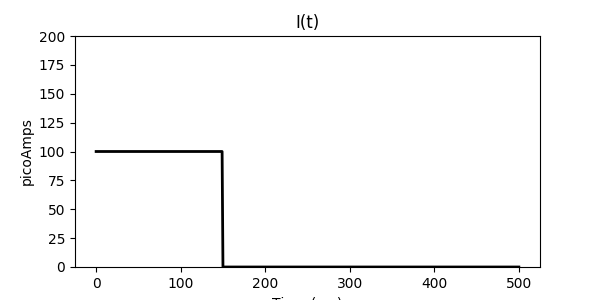

In [15]:
height = 100; stepLength = 150; totalLength = 500
I = np.array([height]*stepLength + [0]*(totalLength-stepLength+1))
plotterOne = PlotterOne(height, totalLength)
plotterOne.plotCurrent(I)

<font color="green">Answer: </font> V(t) membrane equation has the first order differential form of: 

$$ \tau \dot{V} + V  = V_{Leak} + \frac {I_{in}(t)} {G_{Leak}}  $$

where
$$ \ \tau = \frac{C_m}{G_{Leak}} $$

Which is comparable to the general form:

$$ b  \dot{x} + x = c + f(t)  $$

Whose solution is the the convolution of the impulse response function, found by setting right side = 0, and the input function f(t)...

Solving the above equations results in the impulse response of the system, which is an exponential decay function. This impulse response can then be convolved with the time-vayring input (current) to give the the voltage at a given time.
$$ V(t) = V_{Leak} + \Big\{ \frac{I_{in}}{G_{Leak}} * \frac{1}{\tau} e^{-t/ \tau} \Big\}  $$

<IPython.core.display.Javascript object>


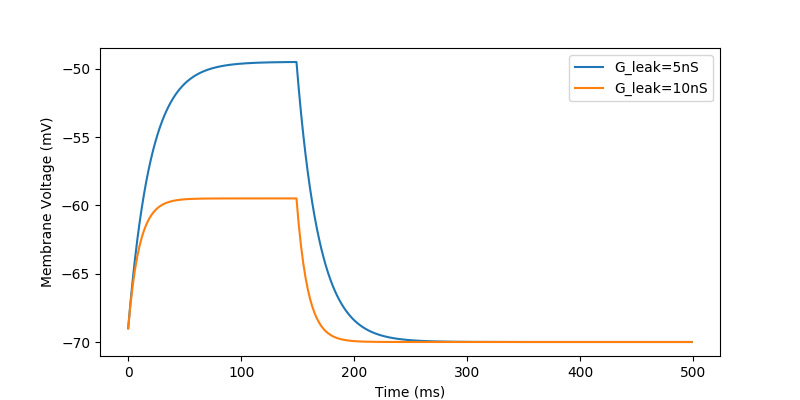

In [16]:
VLeak      = -70
CMembrane  = 100
plt.figure(figsize=(8,4))
for GLeak in (5,10):
    tau = CMembrane/GLeak
    time = np.arange(totalLength)
    VMembrane = VLeak + np.convolve((I/GLeak), np.dot((1/tau),np.exp(-time/tau)))
    plotterOne.plotMembraneVoltage(VMembrane, GLeak)

Change GLeak, change tau, which changes decay and maximum voltage reached as governed by equation


## 2. Shunting Inhibition

Now let’s investigate the non-linear interactions that occur as a result of shunting inhibition. Consider a local compartment with sodium and chloride channels (in addition to $G_{Leak}= 5 nS$, and assume $V_{Leak}$ = -70 $mV$). First write down the membrane equation at equilibrium. Next, plot how the membrane voltage will change as you increase the sodium channel conductance alone, with the chloride channel closed. Then do the same for the chloride channel conductance, with the sodium channel closed. Finally, in a second plot, keep the chloride channel at a fixed conductance ($G_{Cl} = 10nS$) and increase the sodium channel conductance. What happens? How does this compare to what you expect from a linear superposition (plot this as a dashed line). Explain your results in terms of how $G_{Na}$ and $G_{Cl}$ affect the equilibrium membrane equation you wrote earlier.

<font color="green">Answer: </font>  Membrane Equation $$ V = \frac {V_{Na}\Delta G_{Na} + V_{Cl}\Delta G_{Na}G_{Cl} + V_{Leak}G_{Leak}}{Gtotal}$$ 


where $$ Gtotal = \Delta G_{Cl} + \Delta G_{Na} + G_{Leak}$$

In [52]:
from utils.lab1_utils import PlotterTwo

In [53]:
VLeak = -70
VNa = 55
VCl = -65
GLeak = 5
def computeVoltage(GNa, GCl):
    return (VNa * GNa + VCl * GCl + VLeak * GLeak) / float(GNa + GCl + GLeak)

<IPython.core.display.Javascript object>


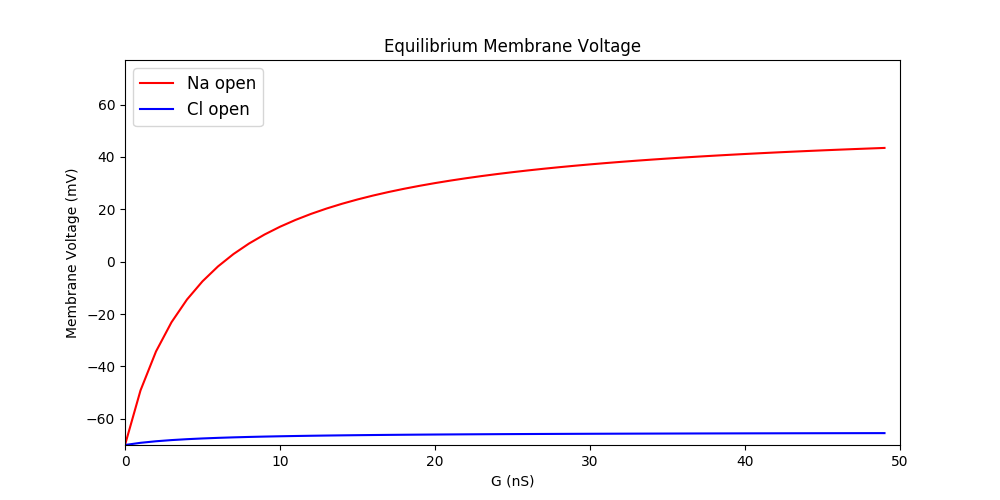

In [54]:
CMembrane = 100
GClFixed = 10

GMax = 50
plotterTwo = PlotterTwo(GMax, VLeak, VNa)

VMemNa = np.zeros(GMax) # Results for opening the Sodium channel
VMemCl = np.zeros(GMax) # Results for opening Chloride channel
VMemNaCl = np.zeros(GMax) # Results for opening Sodium at fixed GCl
VMemLinearNaCl = np.zeros(GMax) # Results for linear prediction
for G in range(GMax):
    VMemNa[G] = computeVoltage(G, 0) # Case 1: Open Na Close Cl
    VMemCl[G] = computeVoltage(0, G) # Case 2: Close Na Open Cl
    VMemNaCl[G] = computeVoltage(G,GClFixed) # Case 3: Open Na, Fix Cl conductance
    VMemLinearNaCl[G] = computeVoltage(G, 0) + computeVoltage(0, GClFixed) - (VLeak*GLe # Case 4: Linear Summation, subtracting one VLeak which would be counted twice


# VMemLinearNaCl2 = VMemNa + VMemCl -VLeak # Same output as Linear summation made in loop. Just sanity check.

plotterTwo.plotEqMembraneVoltage(VMemNa, VMemCl)

<IPython.core.display.Javascript object>


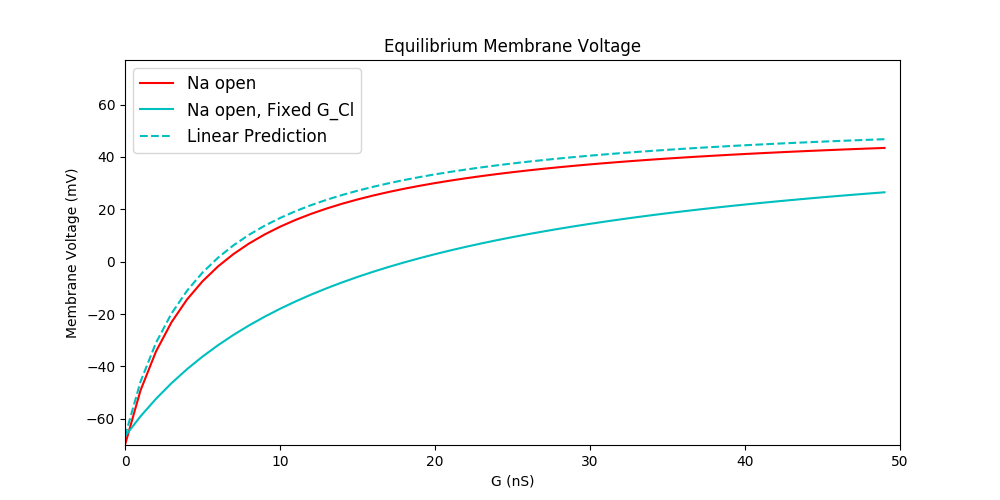

In [51]:
plotterTwo.plotEqMembraneVoltagePrediction(VMemNa, VMemNaCl, VMemLinearNaCl)

The actual joint response with $G_{Cl}$ fixed and $G_{Na}$ open is non-linear since the conductances influence the divisor in the voltage membrane equation. Thus the voltage dynamics is not a simple linear summation (dashed blue line) of the voltage responses with either the $G_{Na}$ or $G_{Cl}$ channels open alone, but instead the actual shunting by the fixed $G_{Cl}$ conductance is more dramatic than the linear prediction as shown by the solid blue line. 